# Exploratory Data Analysis on Fact Checking Website -  "The Politifact"

## Introduction:

The ability to discern news sources based on their credibility and transparency is useful for users in making decisions about news consumption.Data analytics is the best practice of examining data to answer questions, identify trends, and extract insights.Machine learning helps to solve complex problems and to build AI systems nowadays and especially in those cases where we have hinted knowledge or the knowledge that is not known.We used machine learning algorithms and for identification of fake news.
With the integration of Machine learning and text-based processing, we can detect fake news and build classifiers that can classify the news data.Text classification mainlyfocuses on extracting various features of text and after that incorporating those features into classification. The big challenge in this area is the lack of an efficient way to differentiate between fake and non-fake due to the unavailability of information as needed. 
For purposes of attaining this goal, the approach will utilize some factors as a guide to making the decision as to whether to categorize a web page as fake news.Here are some of the factors taken into consideration for analysis purpose.

* Check the source
* Check the author
* Check other sources
* Maintain a critical mindset
* Check the facts
* Check the comments
* Check your own biases
* Check whether it’s a joke
* Check images are authentic
* Use a fact - checking site

We used fact checking sites as one of the primary source for data collection and labeling. Results will be converted into Business Analytics to learn more about Data. Here ,"The Politifact " - one of the famous fact checking website has been used to compare the standards or factors to categorize a web page as fake news. Natural language processing and Machine Learning algorithms are applied for Analysis.

## Purpose:

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

* What question(s) are we trying to solve?
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do we deal with it?
* Where are the outliers and why should we care about them?
* How can we add, change or remove features to get more out of our data?

In [1]:
# Import all the tools we need

# Regular EDA ( Exploratory data analysis ) and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame

from collections import OrderedDict 
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [2]:
# Loading data file
df = pd.read_csv(r'C:/Users/13095/Machinelearning/Sample_Project/Politifact_Dataset/politifact_phase1_clean_2018_7_3.csv',index_col=0)

In [3]:
# to identify the dimensionality of a dataframe
df.shape

(73765, 10)

In [4]:
# to remove the rows that contain NULL Values
df.dropna()

,fact_tag_phase1,article_title_phase1,article_claim_phase1,article_claim_citation_phase1,article_published_date_phase1,article_researched_by_phase1,article_edited_by_phase1,article_categories_phase1,original_url_phase1,page_is_first_citation_phase1
politifact_url_phase1,,,,,,,,,,
http://www.politifact.com/punditfact/statements/2018/jul/02/blog-posting/hoax-website-says-george-h-w-bush-died-he-didnt/,Pants on Fire!,Hoax website says George H. W. Bush died. He d...,"""George H.W. Bush has died at 94.""","— Bloggers on Sunday, July 1st, 2018 in a fak...","Monday, July 2nd, 2018 at 4:18 p.m.",Jon Greenberg,Aaron Sharockman,Fake news,http://nytiwes.com/george-h-w-bush-has-died-at...,True
http://www.politifact.com/punditfact/statements/2018/jul/02/blog-posting/hoax-website-says-george-h-w-bush-died-he-didnt/,Pants on Fire!,Hoax website says George H. W. Bush died. He d...,"""George H.W. Bush has died at 94.""","— Bloggers on Sunday, July 1st, 2018 in a fak...","Monday, July 2nd, 2018 at 4:18 p.m.",Jon Greenberg,Aaron Sharockman,Fake news,https://twitter.com/jgm41,False
http://www.politifact.com/punditfact/statements/2018/jul/02/blog-posting/hoax-website-says-george-h-w-bush-died-he-didnt/,Pants on Fire!,Hoax website says George H. W. Bush died. He d...,"""George H.W. Bush has died at 94.""","— Bloggers on Sunday, July 1st, 2018 in a fak...","Monday, July 2nd, 2018 at 4:18 p.m.",Jon Greenberg,Aaron Sharockman,Fake news,https://twitter.com/GeorgeHWBush,False
http://www.politifact.com/truth-o-meter/statements/2018/jul/02/larry-kudlow/larry-kudlow-wrong-about-deficits-falling-rapidly-/,Pants on Fire!,Larry Kudlow wrong about deficits falling rapi...,"""The deficit ... is coming down, and it's comi...","— Larry Kudlow on Friday, June 29th, 2018 in a...","Monday, July 2nd, 2018 at 2:56 p.m.",Louis Jacobson,Angie Drobnic Holan,"Debt, Deficit, Economy, Taxes",https://twitter.com/FoxBusiness/status/1012678...,True
http://www.politifact.com/truth-o-meter/statements/2018/jul/02/larry-kudlow/larry-kudlow-wrong-about-deficits-falling-rapidly-/,Pants on Fire!,Larry Kudlow wrong about deficits falling rapi...,"""The deficit ... is coming down, and it's comi...","— Larry Kudlow on Friday, June 29th, 2018 in a...","Monday, July 2nd, 2018 at 2:56 p.m.",Louis Jacobson,Angie Drobnic Holan,"Debt, Deficit, Economy, Taxes",https://www.cbo.gov/system/files/115th-congres...,False
...,...,...,...,...,...,...,...,...,...,...
http://www.politifact.com/truth-o-meter/statements/2007/jun/19/bill-richardson/yes-but-note-the-fine-print/,Mostly True,"Yes, but note the fine print","New Mexico moved ""up to"" sixth in the nation i...","— Bill Richardson on Thursday, May 10th, 2007 ...","Tuesday, June 19th, 2007 at 12:00 a.m.",Lea Iadarola,Scott Montgomery,Job Accomplishments,http://www.governor.state.nm.us/press/2006/jan...,True
http://www.politifact.com/truth-o-meter/statements/2007/jun/12/tom-tancredo/most-scientists-say-humans-cause-warming/,False,Most scientists say humans cause warming,"""For every single scientist that tells you (gl...","— Tom Tancredo on Tuesday, May 15th, 2007 in C...","Tuesday, June 12th, 2007 at 12:00 a.m.",Bill Adair,Scott Montgomery,"Climate Change, Environment",http://www.ipcc.ch/,True
http://www.politifact.com/truth-o-meter/statements/2007/jun/12/bill-richardson/correct-but-stats-came-from-friendly-group-/,Mostly True,"Correct, but stats came from friendly group","""New Mexico was 46th in teacher pay (when he w...","— Bill Richardson on Thursday, May 10th, 2007 ...","Tuesday, June 12th, 2007 at 12:00 a.m.",Lea Iadarola,Scott Montgomery,Education,http://www.nea.org/edstats/RankFull06b.htm,True


In [5]:
# to count the number of not empty values for each row or column
df.count()

fact_tag_phase1                  73765
article_title_phase1             73765
article_claim_phase1             73765
article_claim_citation_phase1    73765
article_published_date_phase1    73765
article_researched_by_phase1     73659
article_edited_by_phase1         73302
article_categories_phase1        73765
original_url_phase1              73764
page_is_first_citation_phase1    73765
dtype: int64

In [6]:
# to display the first five rows of the dataframe
df.head()

,fact_tag_phase1,article_title_phase1,article_claim_phase1,article_claim_citation_phase1,article_published_date_phase1,article_researched_by_phase1,article_edited_by_phase1,article_categories_phase1,original_url_phase1,page_is_first_citation_phase1
politifact_url_phase1,,,,,,,,,,
http://www.politifact.com/punditfact/statements/2018/jul/02/blog-posting/hoax-website-says-george-h-w-bush-died-he-didnt/,Pants on Fire!,Hoax website says George H. W. Bush died. He d...,"""George H.W. Bush has died at 94.""","— Bloggers on Sunday, July 1st, 2018 in a fak...","Monday, July 2nd, 2018 at 4:18 p.m.",Jon Greenberg,Aaron Sharockman,Fake news,http://nytiwes.com/george-h-w-bush-has-died-at...,True
http://www.politifact.com/punditfact/statements/2018/jul/02/blog-posting/hoax-website-says-george-h-w-bush-died-he-didnt/,Pants on Fire!,Hoax website says George H. W. Bush died. He d...,"""George H.W. Bush has died at 94.""","— Bloggers on Sunday, July 1st, 2018 in a fak...","Monday, July 2nd, 2018 at 4:18 p.m.",Jon Greenberg,Aaron Sharockman,Fake news,https://twitter.com/jgm41,False
http://www.politifact.com/punditfact/statements/2018/jul/02/blog-posting/hoax-website-says-george-h-w-bush-died-he-didnt/,Pants on Fire!,Hoax website says George H. W. Bush died. He d...,"""George H.W. Bush has died at 94.""","— Bloggers on Sunday, July 1st, 2018 in a fak...","Monday, July 2nd, 2018 at 4:18 p.m.",Jon Greenberg,Aaron Sharockman,Fake news,https://twitter.com/GeorgeHWBush,False
http://www.politifact.com/truth-o-meter/statements/2018/jul/02/larry-kudlow/larry-kudlow-wrong-about-deficits-falling-rapidly-/,Pants on Fire!,Larry Kudlow wrong about deficits falling rapi...,"""The deficit ... is coming down, and it's comi...","— Larry Kudlow on Friday, June 29th, 2018 in a...","Monday, July 2nd, 2018 at 2:56 p.m.",Louis Jacobson,Angie Drobnic Holan,"Debt, Deficit, Economy, Taxes",https://twitter.com/FoxBusiness/status/1012678...,True
http://www.politifact.com/truth-o-meter/statements/2018/jul/02/larry-kudlow/larry-kudlow-wrong-about-deficits-falling-rapidly-/,Pants on Fire!,Larry Kudlow wrong about deficits falling rapi...,"""The deficit ... is coming down, and it's comi...","— Larry Kudlow on Friday, June 29th, 2018 in a...","Monday, July 2nd, 2018 at 2:56 p.m.",Louis Jacobson,Angie Drobnic Holan,"Debt, Deficit, Economy, Taxes",https://www.cbo.gov/system/files/115th-congres...,False


In [7]:
# to know about the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73765 entries, http://www.politifact.com/punditfact/statements/2018/jul/02/blog-posting/hoax-website-says-george-h-w-bush-died-he-didnt/ to http://www.politifact.com/truth-o-meter/statements/2007/may/02/tommy-thompson/he-was-credited-as-a-tinkerer/
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   fact_tag_phase1                73765 non-null  object
 1   article_title_phase1           73765 non-null  object
 2   article_claim_phase1           73765 non-null  object
 3   article_claim_citation_phase1  73765 non-null  object
 4   article_published_date_phase1  73765 non-null  object
 5   article_researched_by_phase1   73659 non-null  object
 6   article_edited_by_phase1       73302 non-null  object
 7   article_categories_phase1      73765 non-null  object
 8   original_url_phase1            73764 non-null  object
 9   page_is_first_citat

In [8]:
# to find the datatypes
df.dtypes

fact_tag_phase1                  object
article_title_phase1             object
article_claim_phase1             object
article_claim_citation_phase1    object
article_published_date_phase1    object
article_researched_by_phase1     object
article_edited_by_phase1         object
article_categories_phase1        object
original_url_phase1              object
page_is_first_citation_phase1      bool
dtype: object

In [9]:
# to find the unique values of categories of the articles
df['article_categories_phase1'].unique()

array(['Fake news', 'Debt, Deficit, Economy, Taxes', 'Economy', ...,
       'Civil Rights, Crime, Gays and Lesbians, Religion',
       'Obama Birth Certificate, Religion', 'Consumer Safety, Regulation'],
      dtype=object)

## Tags associated with News articles

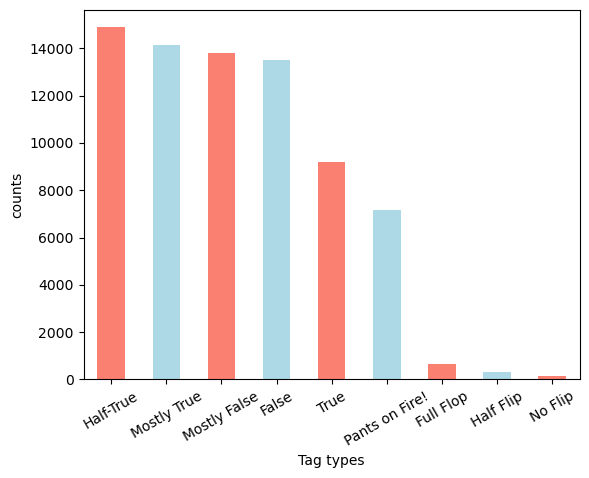

In [10]:
df["fact_tag_phase1"].value_counts().plot(kind="bar",color=["salmon","lightblue"])
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Tag types")
plt.ylabel("counts")
plt.show()

In [11]:
# Create a function to for N-Gram language Model using CountVectorizer()
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

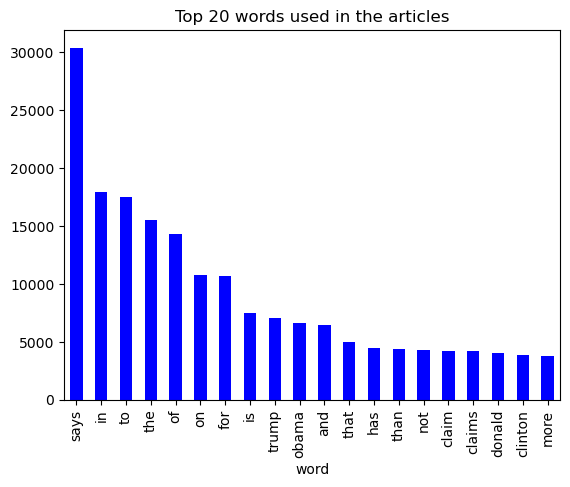

In [12]:
# to find the top 20 words used in the articles 
common_words = get_top_n_words(df['article_title_phase1'], 20)
df2 = DataFrame (common_words,columns=['word','count'])
df2.groupby('word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words used in the articles',color='blue')
plt.show()

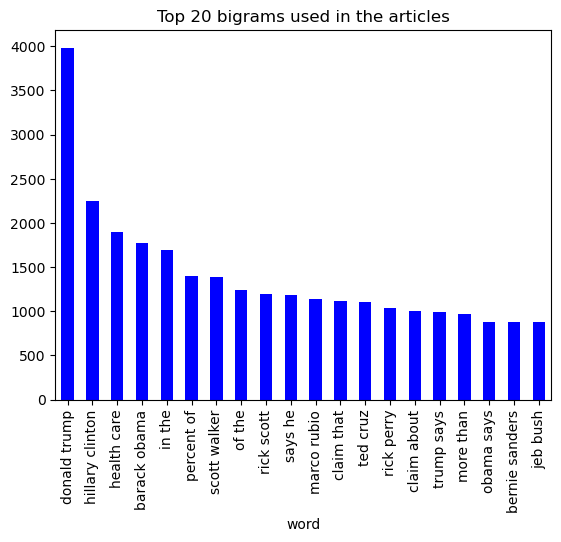

In [13]:
# to find the top 20 bigrams used in the articles
common_words = get_top_n_bigram(df['article_title_phase1'], 20)
df2 = DataFrame (common_words,columns=['word','count'])
df2.groupby('word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams used in the articles',color='blue')
plt.show()

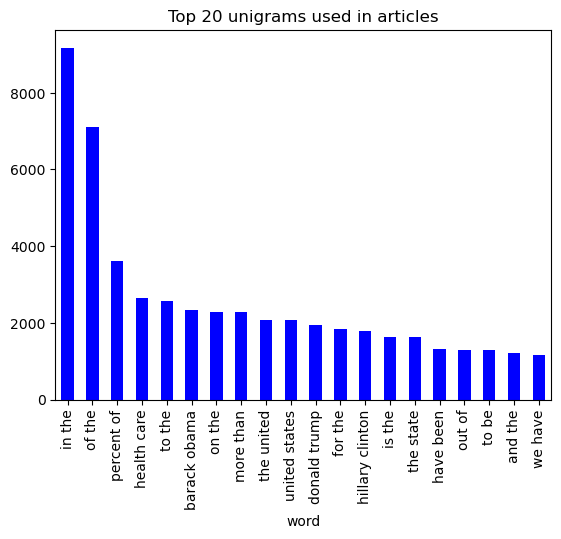

In [14]:
common_words = get_top_n_bigram(df['article_claim_phase1'], 20)
df2 = DataFrame (common_words,columns=['word','count'])
df2.groupby('word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 unigrams used in articles',color='blue')
plt.show()

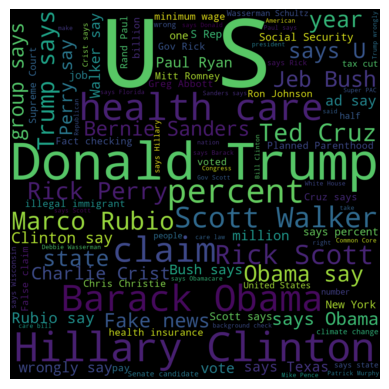

In [15]:
# to identify "keywords" that appear frequently in the Title

wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['article_title_phase1']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

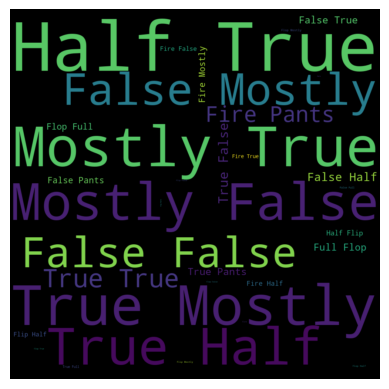

In [16]:
# to identify "keywords" that appear frequently in the Tag
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['fact_tag_phase1']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
# to find out the unique URLs in the dataset.
df['original_url_phase1'].unique()

array(['http://nytiwes.com/george-h-w-bush-has-died-at-94/',
       'https://twitter.com/jgm41', 'https://twitter.com/GeorgeHWBush',
       ..., 'http://www.ipcc.ch/',
       'http://www.nea.org/edstats/RankFull06b.htm',
       'http://www.allianceforschoolchoice.org/school_choice_history.aspx/'],
      dtype=object)

In [18]:
# Assigning numbers for the tags
type1 = {'Pants on Fire!':0,'False':1, 'Mostly True':2, 'Half-True':3, 'True':4,
       'Mostly False':5, 'Full Flop':6, 'Half Flip':7, 'No Flip':8}
df.fact_tag_phase1 = [type1[item] for item in df.fact_tag_phase1] 

In [19]:
df_type = df[['original_url_phase1','fact_tag_phase1']]
val_pantsonfire=[]
val_false=[]
val_mostlytrue=[]
val_halftrue=[]
val_true=[]
val_mostlyfalse=[]
val_fullflop=[]
val_halfflip=[]
val_noflip=[]
{'Pants on Fire!':0,'False':1, 'Mostly True':2, 'Half-True':3, 'True':4,
       'Mostly False':5, 'Full Flop':6, 'Half Flip':7, 'No Flip':8}
for i,row in df_type.iterrows():
    val = row['original_url_phase1']
    if row['fact_tag_phase1'] == 0:
        val_pantsonfire.append(val)
    elif row['fact_tag_phase1']== 1:
        val_false.append(val)
    elif row['fact_tag_phase1']== 2:
        val_mostlytrue.append(val)
    elif row['fact_tag_phase1']== 3:
        val_halftrue.append(val)
    elif row['fact_tag_phase1']== 4:
        val_true.append(val)
    elif row['fact_tag_phase1']== 5:
        val_mostlyfalse.append(val)
    elif row['fact_tag_phase1']== 6:
        val_fullflop.append(val)
    elif row['fact_tag_phase1']== 7:
        val_halfflip.append(val)
    elif row['fact_tag_phase1']==8:
        val_noflip.append(val)

In [20]:
  
uv_pantsonfire = list(OrderedDict.fromkeys(val_pantsonfire)) 
uv_false = list(OrderedDict.fromkeys(val_false)) 
uv_mostlytrue= list(OrderedDict.fromkeys(val_mostlytrue)) 
uv_halftrue = list(OrderedDict.fromkeys(val_halftrue)) 
uv_true = list(OrderedDict.fromkeys(val_true)) 
uv_mostlyfalse = list(OrderedDict.fromkeys(val_mostlyfalse)) 
uv_fullflop = list(OrderedDict.fromkeys(val_fullflop)) 
uv_halfflip = list(OrderedDict.fromkeys(val_halfflip)) 
uv_noflip = list(OrderedDict.fromkeys(val_noflip))

print(f"{b_}{type1}\n")
i=0


{'Pants on Fire!': 0, 'False': 1, 'Mostly True': 2, 'Half-True': 3, 'True': 4, 'Mostly False': 5, 'Full Flop': 6, 'Half Flip': 7, 'No Flip': 8}



In [21]:
df1=df.sample(frac=1)
df1.head()

,fact_tag_phase1,article_title_phase1,article_claim_phase1,article_claim_citation_phase1,article_published_date_phase1,article_researched_by_phase1,article_edited_by_phase1,article_categories_phase1,original_url_phase1,page_is_first_citation_phase1
politifact_url_phase1,,,,,,,,,,
http://www.politifact.com/virginia/statements/2011/mar/21/organizing-america/organizing-america-says-gop-budget-would-cut-1-mil/,3,Organizing for America says GOP budget would c...,"The GOP budget plan ""would cut nearly a millio...","— Organizing for America on Monday, March 14t...","Monday, March 21st, 2011 at 8:00 a.m.",Jacob Geiger,Warren Fiske,"Economy, Federal Budget, Jobs",http://twitter.com/OFA_VA/status/4701155247325...,True
http://www.politifact.com/texas/statements/2015/aug/21/bruce-elfant/bruce-elfant-says-us-about-100th-voter-turnout-tex/,2,Bruce Elfant says U.S. about 100th in voter tu...,"""The United States is about 100th in voter tur...","— Bruce Elfant on Wednesday, August 5th, 2015 ...","Friday, August 21st, 2015 at 2:18 p.m.",W. Gardner Selby,John Bridges,Elections,https://docs.google.com/document/d/1NeNd6BJdUK...,False
http://www.politifact.com/truth-o-meter/statements/2013/aug/22/carly-fiorina/only-four-countries-legalize-abortion-after-5-mont/,3,Only four countries 'legalize abortion after 5...,"""There are only four countries in the world th...","— Carly Fiorina on Sunday, August 18th, 2013 i...","Thursday, August 22nd, 2013 at 1:54 p.m.",Julie Kliegman,Amy Hollyfield,Abortion,http://reproductiverights.org/sites/crr.civica...,False
http://www.politifact.com/truth-o-meter/statements/2010/aug/05/sharron-angle/sharron-angle-blames-harry-reid-nevada-economic-wo/,3,Sharron Angle blames Harry Reid for Nevada eco...,"""Harry Reid says he does more for Nevada. He's...","— Sharron Angle on Wednesday, July 21st, 2010 ...","Thursday, August 5th, 2010 at 1:54 p.m.",Erin Mershon,Martha M. Hamilton,"Bankruptcy, Economy, Housing, Message Machine ...",http://www.politico.com/news/stories/0710/4046...,False
http://www.politifact.com/truth-o-meter/statements/2016/jun/24/donald-trump/what-do-we-know-about-hillary-clintons-religion-lo/,0,What do we know about Hillary Clinton's religi...,"""We don't know anything about Hillary in terms...","— Donald Trump on Tuesday, June 21st, 2016 in ...","Friday, June 24th, 2016 at 11:53 a.m.",Neelesh Moorthy,Aaron Sharockman,Religion,http://www.nytimes.com/politics/first-draft/20...,False


In [22]:
# dropping the features that are not necessary for the analysis
df1 = df1.drop(['article_claim_phase1','article_claim_citation_phase1','article_published_date_phase1','article_researched_by_phase1','article_edited_by_phase1','article_categories_phase1','page_is_first_citation_phase1'],axis=1)  

In [23]:
# after dropping the columns, the three different features are taken for analysis
df1.dtypes

fact_tag_phase1          int64
article_title_phase1    object
original_url_phase1     object
dtype: object

In [24]:
# Adding a new column in the dataset
df1['Title_without_stopwords']= ' '

In [25]:
# Adding NLTK took build for working with NLP functions
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13095\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# Defining the stop_words
stop_words = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']


In [27]:
df1.columns = ['Type','Title','Site_url','Title_without_stopwords']

In [28]:
df1.head()

,Type,Title,Site_url,Title_without_stopwords
politifact_url_phase1,,,,
http://www.politifact.com/virginia/statements/2011/mar/21/organizing-america/organizing-america-says-gop-budget-would-cut-1-mil/,3,Organizing for America says GOP budget would c...,http://twitter.com/OFA_VA/status/4701155247325...,
http://www.politifact.com/texas/statements/2015/aug/21/bruce-elfant/bruce-elfant-says-us-about-100th-voter-turnout-tex/,2,Bruce Elfant says U.S. about 100th in voter tu...,https://docs.google.com/document/d/1NeNd6BJdUK...,
http://www.politifact.com/truth-o-meter/statements/2013/aug/22/carly-fiorina/only-four-countries-legalize-abortion-after-5-mont/,3,Only four countries 'legalize abortion after 5...,http://reproductiverights.org/sites/crr.civica...,
http://www.politifact.com/truth-o-meter/statements/2010/aug/05/sharron-angle/sharron-angle-blames-harry-reid-nevada-economic-wo/,3,Sharron Angle blames Harry Reid for Nevada eco...,http://www.politico.com/news/stories/0710/4046...,
http://www.politifact.com/truth-o-meter/statements/2016/jun/24/donald-trump/what-do-we-know-about-hillary-clintons-religion-lo/,0,What do we know about Hillary Clinton's religi...,http://www.nytimes.com/politics/first-draft/20...,


In [29]:
df1.dtypes



Type                        int64
Title                      object
Site_url                   object
Title_without_stopwords    object
dtype: object

In [30]:
# remove stopwords from the  title 
df1['Title_without_stopwords'] = df1.apply(lambda row: nltk.word_tokenize(row['Title']), axis=1)

df1['Title_without_stopwords'] = df1['Title_without_stopwords'].apply(lambda words: [word for word in words if word not in stop_words])

df1['Title_without_stopwords'] = [' '.join(map(str, l)) for l in df1['Title_without_stopwords']]

In [31]:
# creating a new dataframe

new_df = df1.sample(frac=1)
new_df.head()

,Type,Title,Site_url,Title_without_stopwords
politifact_url_phase1,,,,
http://www.politifact.com/ohio/statements/2018/jan/23/jon-husted/ohio-secretary-state-jon-husteds-tweets-about-clos/,4,Ohio Secretary of State Jon Husted's tweets ab...,https://www.sos.state.oh.us/media-center/press...,Ohio Secretary State Jon Husted 's tweets clos...
http://www.politifact.com/global-news/statements/2016/sep/07/justin-trudeau/do-girls-make-majority-new-hiv-infections-among-af/,2,Do girls make up the majority of new HIV infec...,https://www.one.org/us/2016/08/25/trudeau_lett...,Do girls make majority new HIV infections amon...
http://www.politifact.com/punditfact/statements/2014/oct/30/nicholas-kristof/kristof-dallas-cowboys-stadium-draws-3-times-more-/,2,Kristof: Dallas Cowboys stadium draws 3 times ...,http://www.eia.gov/countries/country-data.cfm?...,Kristof : Dallas Cowboys stadium draws 3 times...
http://www.politifact.com/new-jersey/statements/2013/jan/31/rodney-frelinghuysen/hurricane-sandy-damaged-area-representing-about-10/,2,Hurricane Sandy damaged an area representing a...,http://www.c-spanvideo.org/program/ReliefDe,Hurricane Sandy damaged area representing 10 p...
http://www.politifact.com/truth-o-meter/statements/2017/sep/22/roy-moore/debate-roy-moore-claims-daca-immigration-rules-vio/,3,"In debate, Roy Moore claims DACA was a 'mere m...",https://youtu.be/d56kZiYse9o,"In debate , Roy Moore claims DACA 'mere memo ,..."


## Training and Evaluation of  Models

In [32]:
# Creating a variables 
y = new_df.Type
x = new_df.loc[:,['Site_url','Title_without_stopwords']]
x['source'] = x["Site_url"].astype(str) +" "+ x["Title_without_stopwords"].astype(str) 
x = x.drop(['Site_url','Title_without_stopwords'],axis=1)
x = x.source

In [33]:
# splitting data arrays ito two subsets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())

In [34]:
tfidf_vect

TfidfVectorizer(stop_words='english')

In [35]:
tfidf_train.shape

(51635, 77679)

In [36]:
# Using AdaBoostClassifier algorithm

Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred3)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.282


In [37]:
# Using RandomForestClassifier 

Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)

accuracy:  0.831


In [43]:
# Import pickle Package
import pickle

# Save the Modle to file in the current working directory

Pkl_Filename = "Politificat_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(Rando, file)


In [44]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

RandomForestClassifier(random_state=0)